In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
import math
%matplotlib inline

In [2]:
data = pd.read_csv('Fossil_Gen_Cost_df.csv')
data = data[data.State != 'District Of Columbia : electric utility']
data = data.sort(['YYMM','State'])
data = data.reset_index(drop=True)
data = data.replace('--',0)
data.Coal = data.Coal.astype(float)
data.NG = data.NG.astype(float)
data.YYMM = data.YYMM.apply(str)
data.head()

/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,YYMM,State,Coal,NG,Petroleum
0,200801,AK,1.34,4.05,19.70
1,200801,AL,2.15,8.24,18.21
2,200801,AR,1.81,8.99,14.43
3,200801,AZ,1.62,8.01,19.90
4,200801,CA,1.41,7.27,19.96


In [3]:
year = np.arange(2008, 2017)
state = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
         'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 
         'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 
         'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
         'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
df_avg = pd.DataFrame(columns = ['Year', 'States', 'Coal', 'NG', 'Petro'])
for i in range(len(year)):
    for j in range(len(state)):
        df_avg.loc[i*len(state)+ j] = [str(year[i]), state[j]
                                    , data[data['YYMM'].str.contains(str(year[i]))][
                                        data.State == state[j]][data.Coal !=0 ].Coal.mean()
                                    , data[data['YYMM'].str.contains(str(year[i]))][
                                        data.State == state[j]][data.NG !=0 ].NG.mean()
                                    , data[data['YYMM'].str.contains(str(year[i]))][
                                        data.State == state[j]][data.Petroleum !=0 ].Petroleum.mean()]

/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [4]:
df_avg

,Year,States,Coal,NG,Petro
0,2008,AK,1.453333,4.578333,22.521667
1,2008,AL,2.688333,9.514167,21.605833
2,2008,AR,1.719167,10.265833,15.248333
3,2008,AZ,1.729167,8.460000,23.175000
4,2008,CA,1.455833,7.855833,22.707500
5,2008,CO,1.436667,6.833333,23.545833
6,2008,CT,3.489167,30.375455,21.749167
7,2008,DE,2.877500,10.033333,20.639167
8,2008,FL,2.893333,10.183333,12.390000
9,2008,GA,3.035000,10.156667,17.721667


In [5]:
df_avg[ pd.isnull(df_avg.Coal) == True]

,Year,States,Coal,NG,Petro
50,2009,AK,NaN,5.071667,13.460833
60,2009,HI,NaN,5.071667,10.272500
100,2010,AK,NaN,4.331667,17.117500
110,2010,HI,NaN,4.331667,14.321667
130,2010,NJ,NaN,NaN,NaN
150,2011,AK,NaN,5.008333,23.265833
160,2011,HI,NaN,5.008333,20.370000
180,2011,NJ,NaN,NaN,NaN
200,2012,AK,NaN,4.266667,23.568333
210,2012,HI,NaN,4.266667,21.987500


In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/taiyupan/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/taiyupan/miniconda3/lib/python3.5/site-packages/matplotli

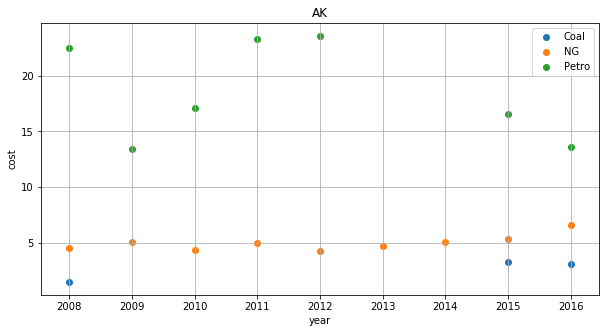

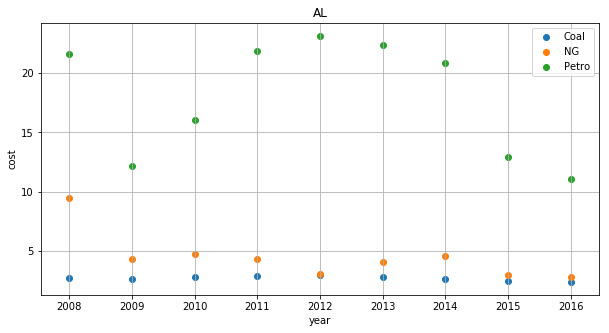

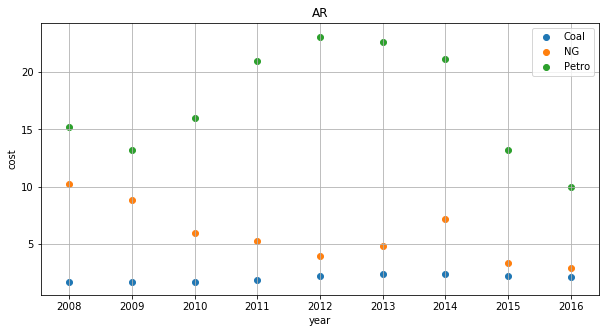

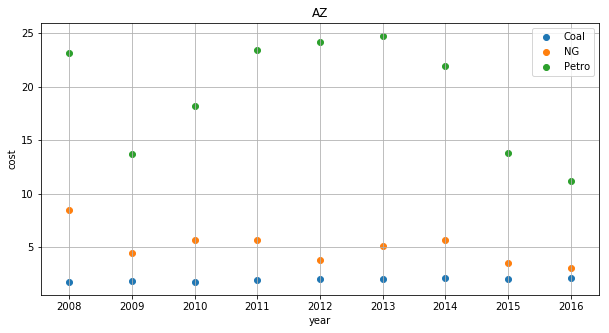

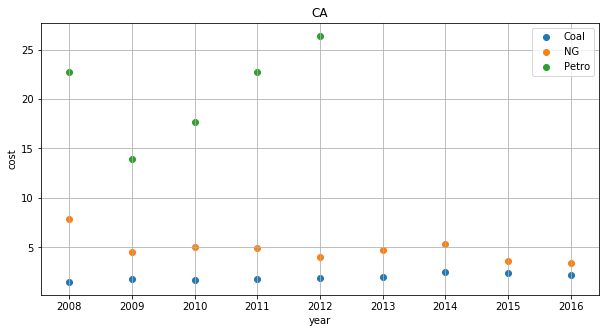

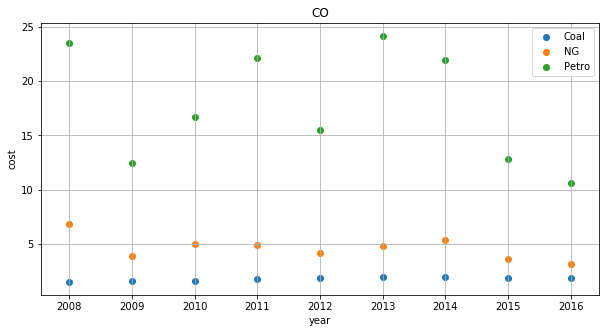

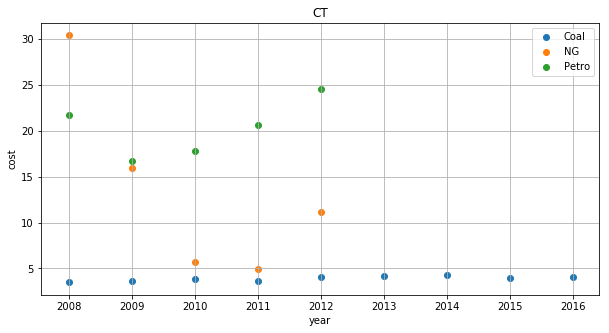

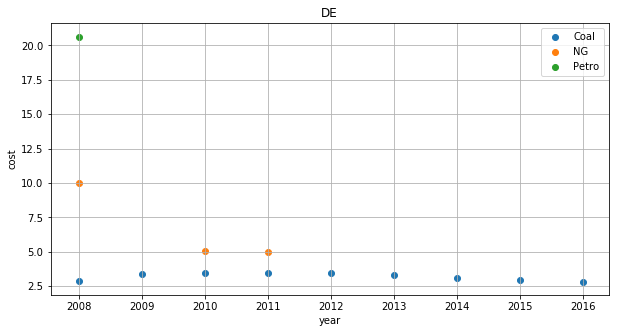

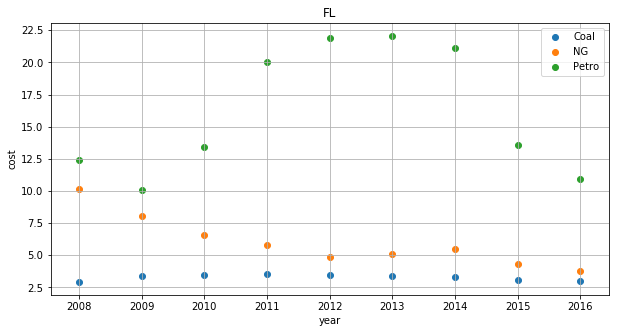

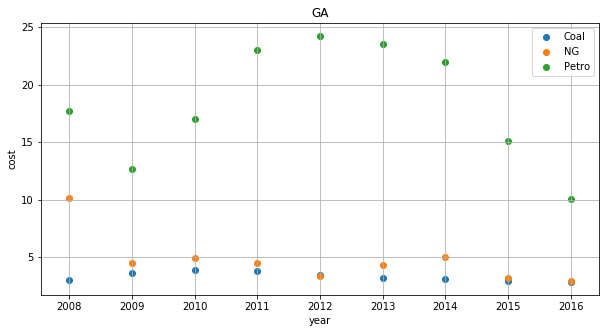

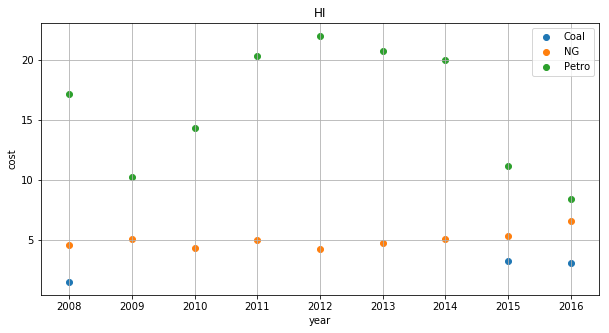

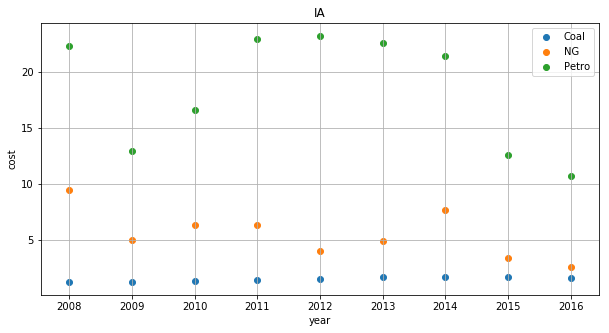

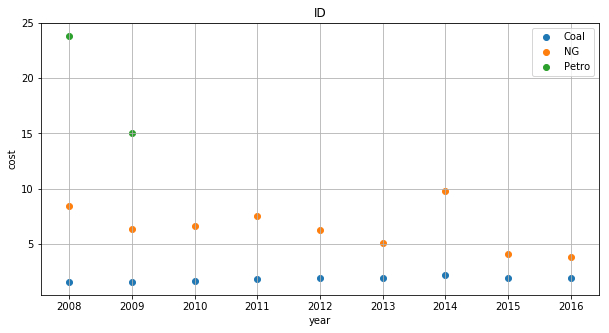

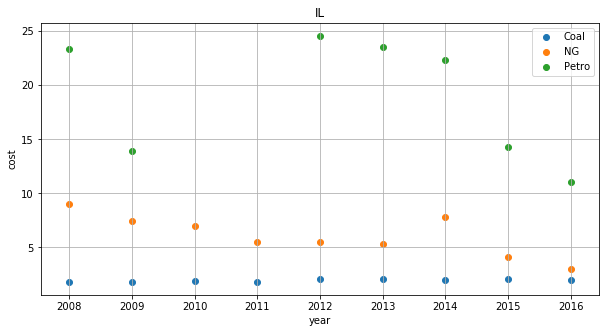

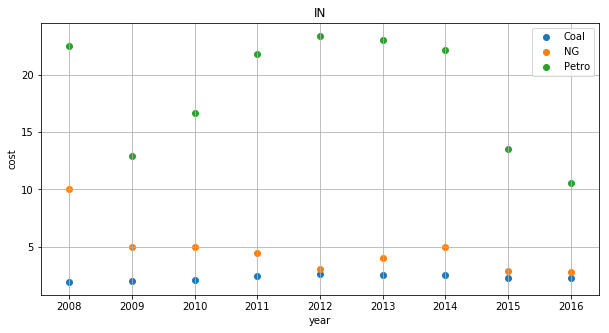

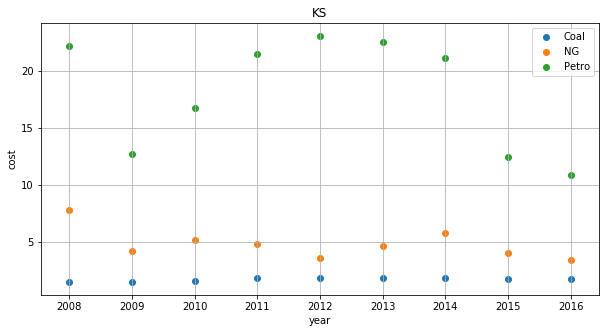

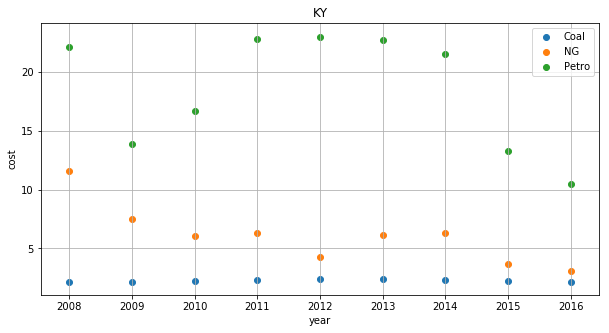

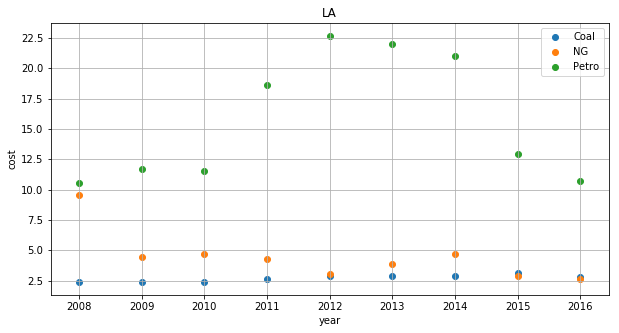

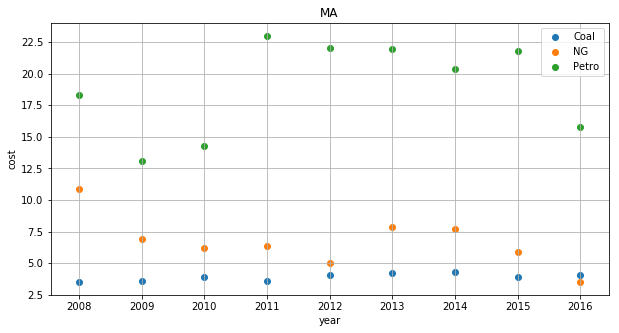

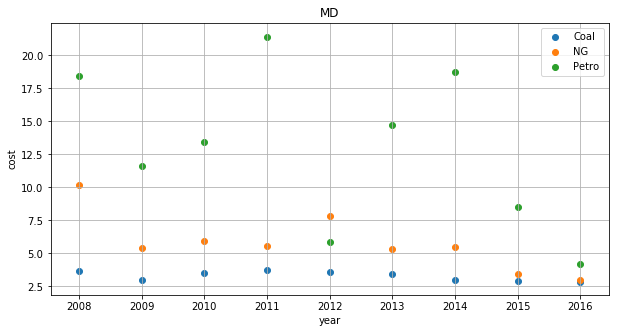

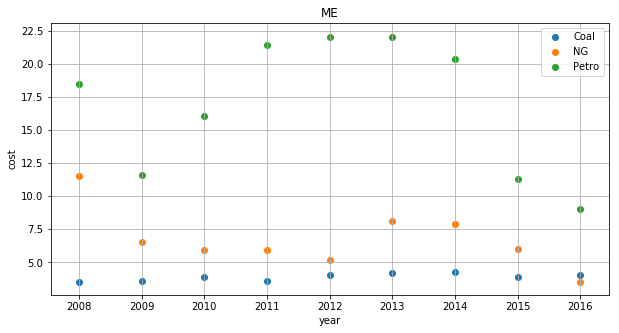

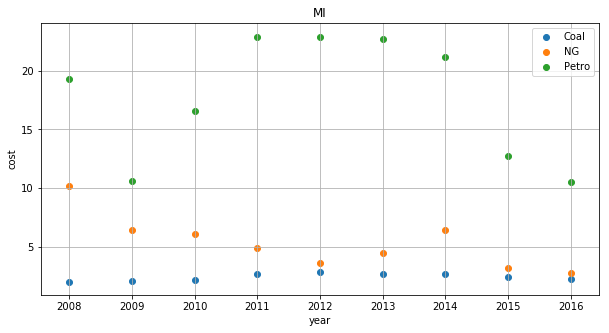

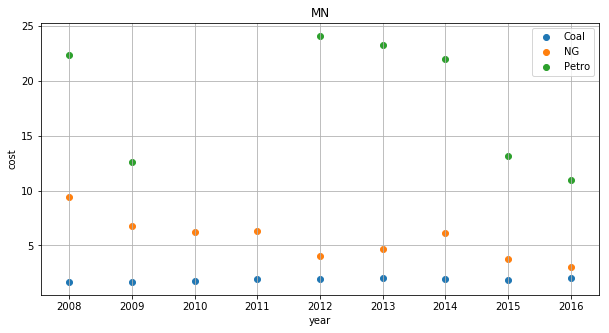

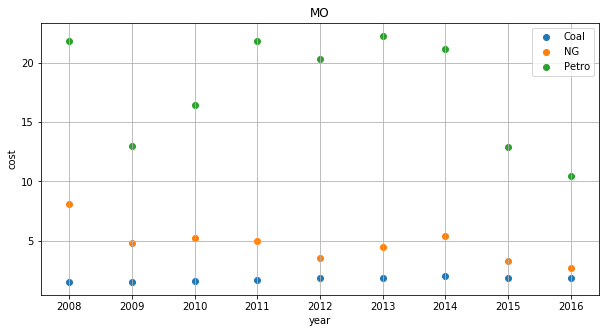

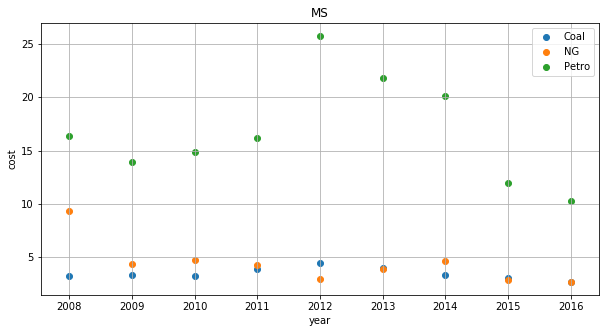

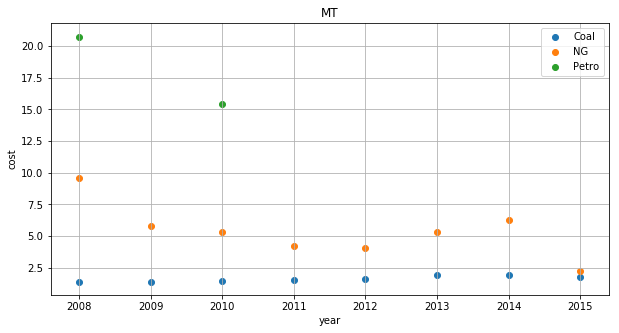

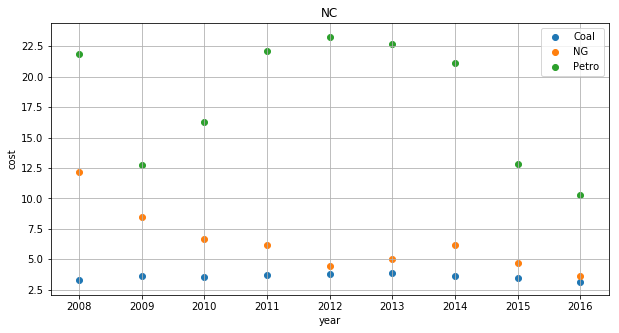

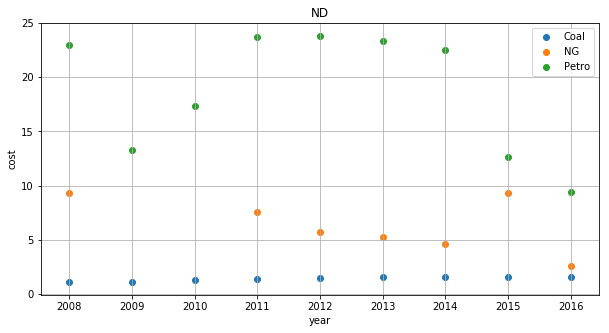

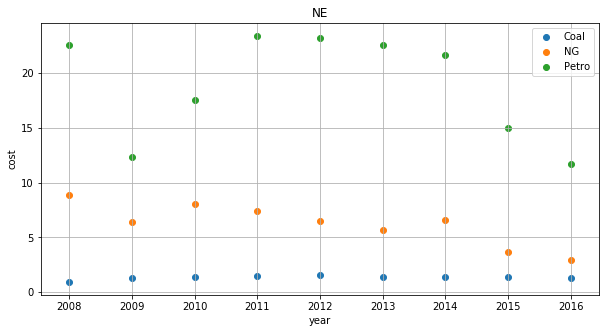

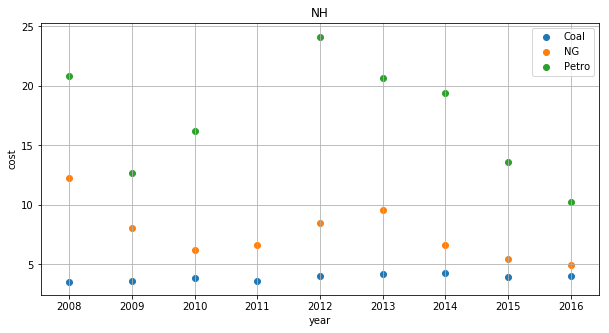

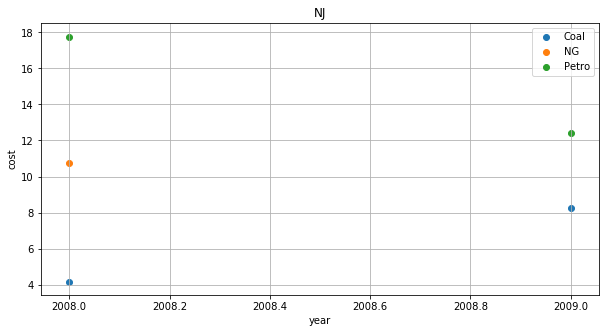

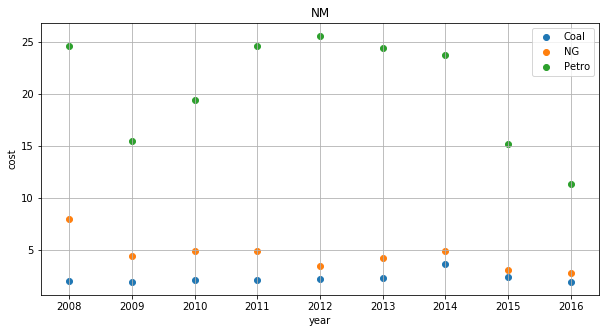

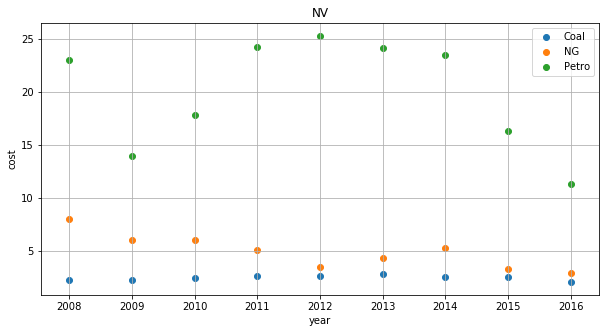

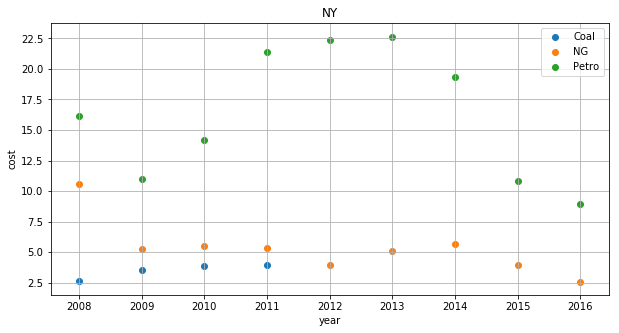

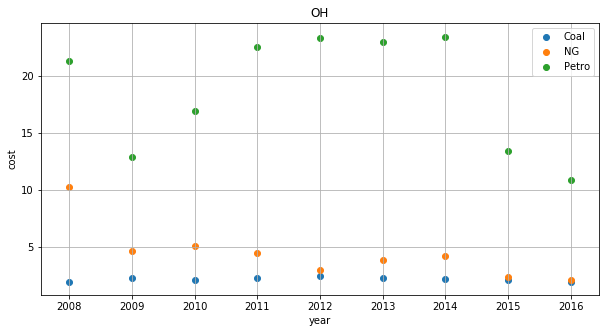

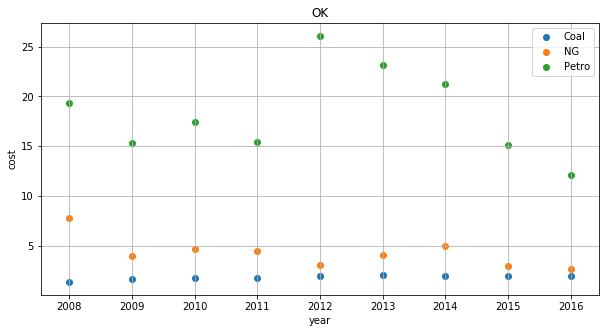

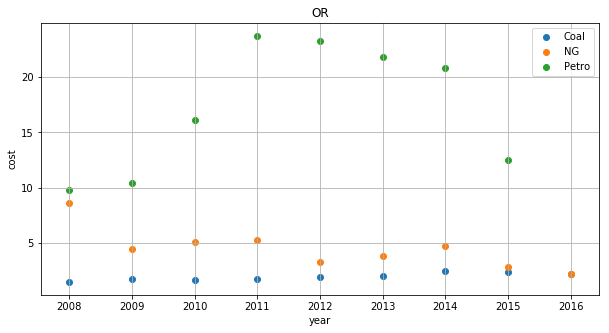

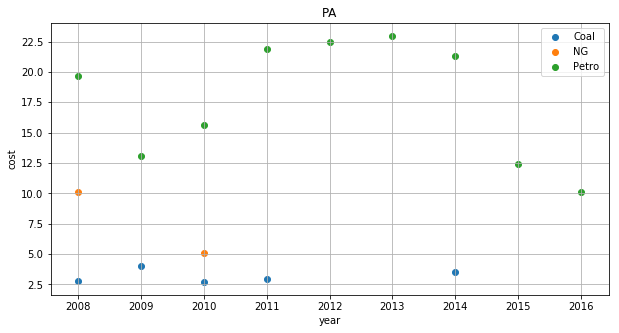

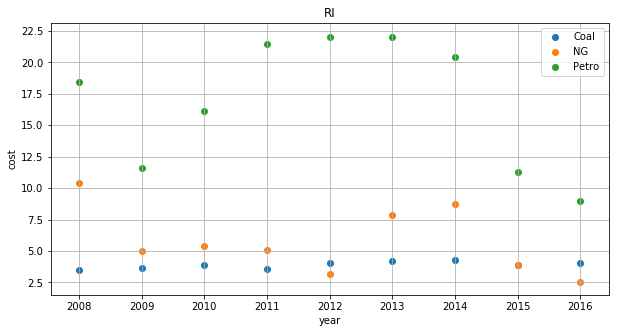

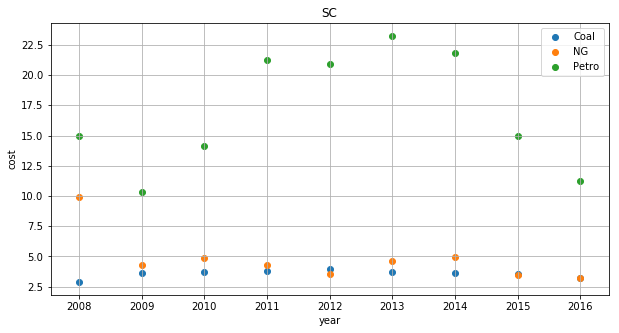

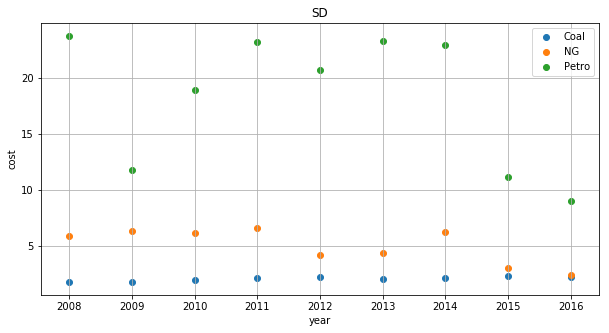

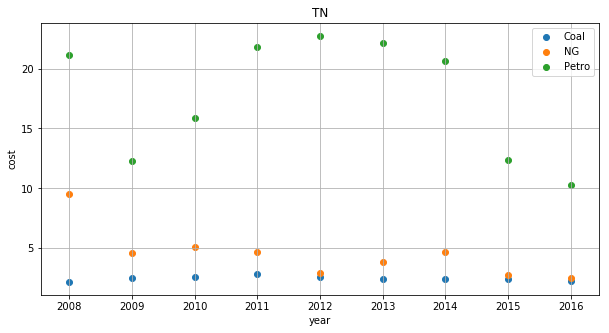

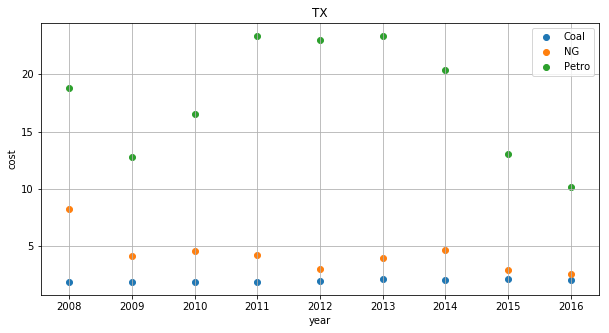

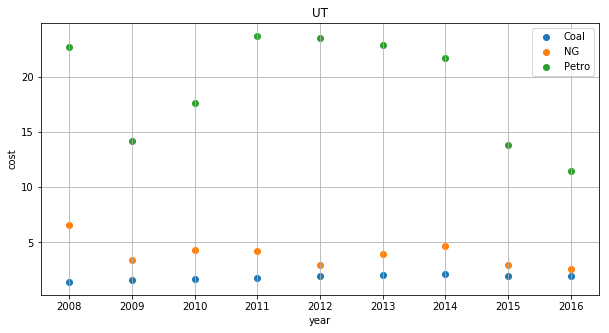

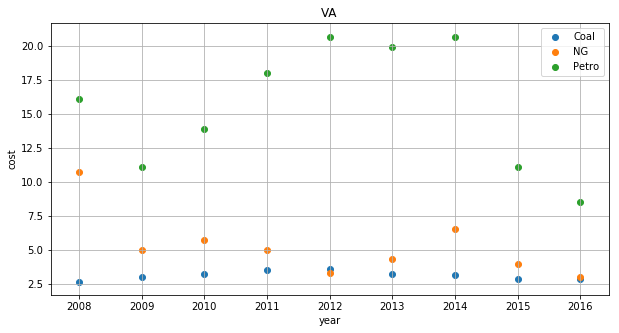

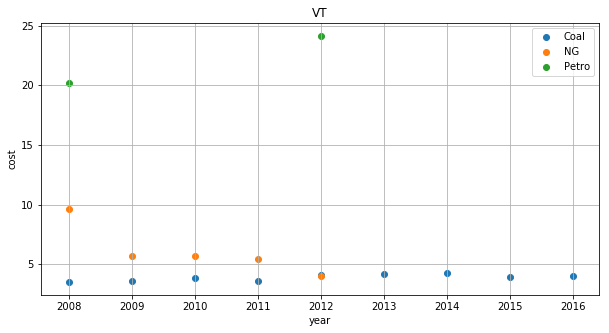

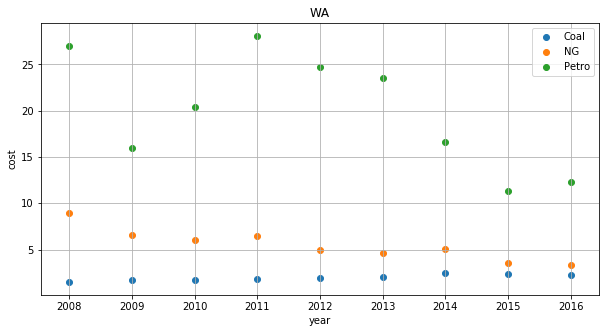

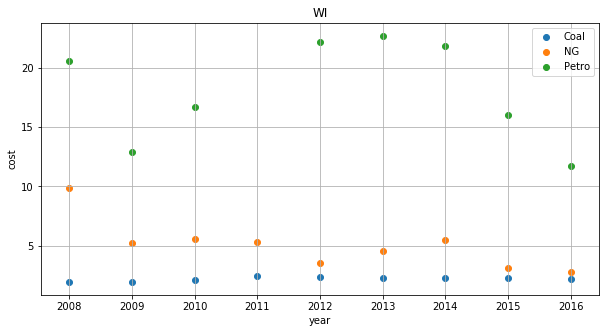

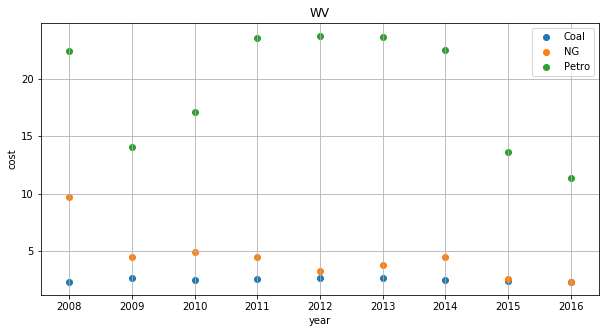

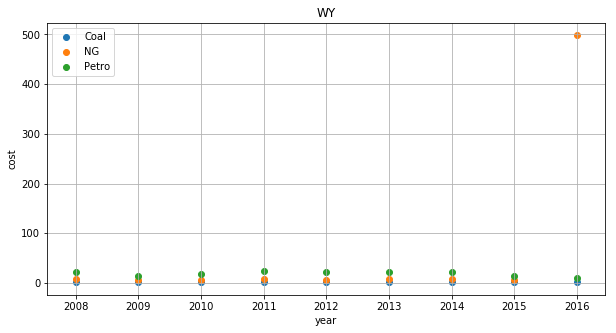

In [7]:
for i in state:
    plt.figure(figsize = (10,5))
    plt.subplot(111)
    plt.scatter(list(df_avg[ df_avg.States == i ][ pd.isnull(df_avg.Coal) == False].Year),
                list(df_avg[ df_avg.States == i ][ pd.isnull(df_avg.Coal) == False].Coal), label = 'Coal')
    plt.scatter(list(df_avg[ df_avg.States == i ][ pd.isnull(df_avg.NG) == False].Year),
                list(df_avg[ df_avg.States == i ][ pd.isnull(df_avg.NG) == False].NG), label = 'NG')
    plt.scatter(list(df_avg[ df_avg.States == i ][ pd.isnull(df_avg.Petro) == False].Year),
                list(df_avg[ df_avg.States == i ][ pd.isnull(df_avg.Petro) == False].Petro), label = 'Petro')
    plt.ylabel('cost')
    plt.xlabel('year')
    plt.title(i)
    plt.grid()
    plt.legend()

In [8]:
df_avg[ df_avg.States == 'AK' ]

,Year,States,Coal,NG,Petro
0,2008,AK,1.453333,4.578333,22.521667
50,2009,AK,NaN,5.071667,13.460833
100,2010,AK,NaN,4.331667,17.117500
150,2011,AK,NaN,5.008333,23.265833
200,2012,AK,NaN,4.266667,23.568333
250,2013,AK,NaN,4.709167,NaN
300,2014,AK,NaN,5.063333,NaN
350,2015,AK,3.240000,5.352500,16.612857
400,2016,AK,3.071818,6.584545,13.561250
